In [1]:
# %config IPCompleter.greedy=True

In [3]:
import sklearn.cluster, sklearn.metrics
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

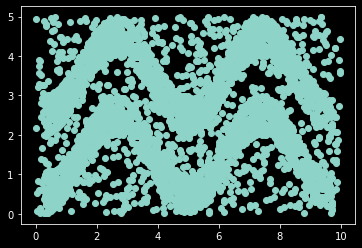

In [34]:
sinusoidFile = "data/densegrid.csv"
sinusoid=np.loadtxt(sinusoidFile,delimiter=";")
plot.scatter(sinusoid[:,0],sinusoid[:,1])

In [10]:
distMat = scipy.spatial.distance_matrix(sinusoid,sinusoid)
closest = np.where(distMat == 0, 99, distMat).min(axis=0)
pd.Series(closest).hist(bins=30)

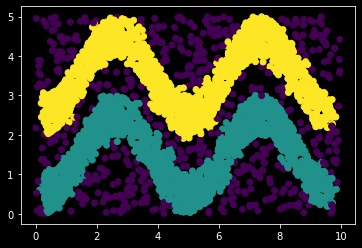

In [33]:
cluster=sklearn.cluster.DBSCAN(eps=0.20,min_samples=15).fit(sinusoid)
plot.scatter(sinusoid[:,0],sinusoid[:,1],c=cluster.labels_)

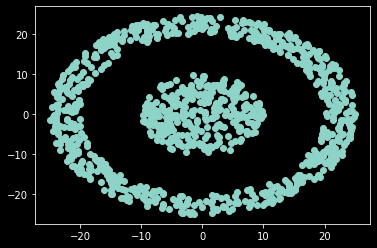

In [36]:
circlesFile = "data/annulus.csv"
circles=np.loadtxt(circlesFile,delimiter=";")
plot.scatter(circles[:,0],circles[:,1])

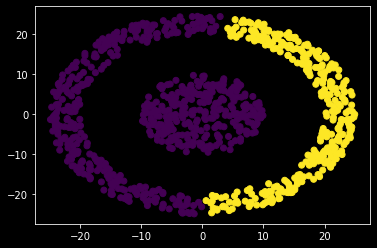

In [49]:
circleClusterWrong = sklearn.cluster.AgglomerativeClustering(n_clusters=2,affinity="euclid",linkage="complete").fit(circles)
plot.scatter(circles[:,0],circles[:,1],c=circleClusterWrong.labels_)

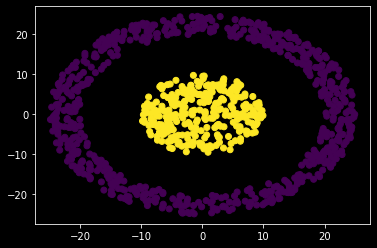

In [50]:
circleCluster = sklearn.cluster.AgglomerativeClustering(n_clusters=2,affinity="euclid",linkage="single").fit(circles)
plot.scatter(circles[:,0],circles[:,1],c=circleCluster.labels_)

In [46]:
sklearn.metrics.silhouette_score(circles, circleCluster.labels_)

0.043866758917703565

In [47]:
# Spatne shlukovani ma lepsi siluetu...
sklearn.metrics.silhouette_score(circles, circleClusterWrong.labels_)

0.3386728061981203

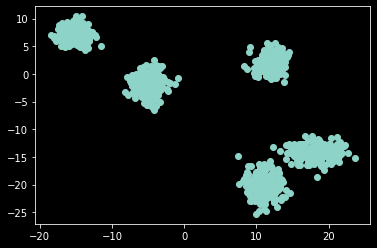

In [54]:
pointsFile = "data/clusters5.csv"
points=np.loadtxt(pointsFile,delimiter=";")
plot.scatter(points[:,0],points[:,1])


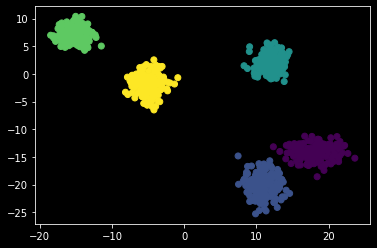

In [57]:
pointsAgloCluster = sklearn.cluster.AgglomerativeClustering(n_clusters=5,affinity="euclid",linkage="complete").fit(points)
plot.scatter(points[:,0],points[:,1],c=pointsAgloCluster.labels_)

In [59]:
results = []
for clusterSize in range(2,10):
    pac = sklearn.cluster.AgglomerativeClustering(n_clusters=clusterSize,affinity="euclid",linkage="complete").fit(points)
    results.append({'Cluster size' : clusterSize, 'Sillhouette': sklearn.metrics.silhouette_score(points, pac.labels_)})
pd.DataFrame(results)

,Cluster size,Sillhouette
0,2,0.623666
1,3,0.698608
2,4,0.773552
3,5,0.778993
4,6,0.666624
5,7,0.593784
6,8,0.485875
7,9,0.363664


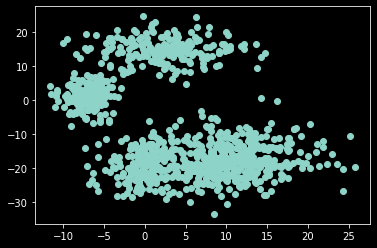

In [60]:
pointsFile2 = "data/clusters5n.csv"
points2=np.loadtxt(pointsFile2,delimiter=";")
plot.scatter(points2[:,0],points2[:,1])

In [61]:
results2 = []
for clusterSize in range(2,10):
    pac = sklearn.cluster.AgglomerativeClustering(n_clusters=clusterSize,affinity="euclid",linkage="complete").fit(points2)
    results2.append({'Cluster size' : clusterSize, 'Sillhouette': sklearn.metrics.silhouette_score(points, pac.labels_)})
pd.DataFrame(results)

,Cluster size,Sillhouette
0,2,0.623666
1,3,0.698608
2,4,0.773552
3,5,0.778993
4,6,0.666624
5,7,0.593784
6,8,0.485875
7,9,0.363664


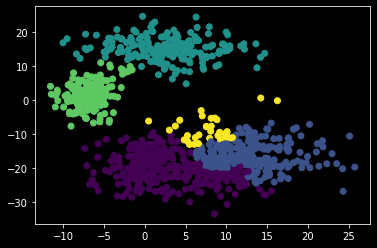

In [62]:
pointsAgloCluster2 = sklearn.cluster.AgglomerativeClustering(n_clusters=5,affinity="euclid",linkage="complete").fit(points2)
plot.scatter(points2[:,0],points2[:,1],c=pointsAgloCluster2.labels_)

0.38205920514373914

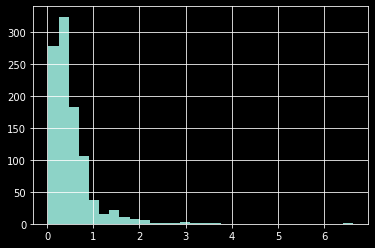

In [66]:
pointsDM = scipy.spatial.distance_matrix(points2,points2)
closestPoints = np.where(pointsDM == 0, 99, pointsDM).min(axis=0)
pd.Series(closestPoints).hist(bins=30)
np.median(closestPoints)
np.mean(closestPoints)


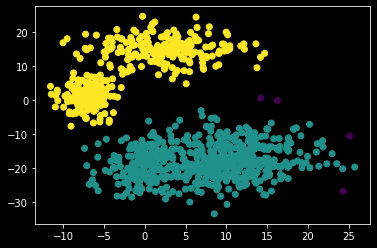

In [92]:
points2DB = sklearn.cluster.DBSCAN(eps=3.4, min_samples=4).fit(points2)
plot.scatter(points2[:,0],points2[:,1],c=points2DB.labels_)